# 599 Final EDA

* Import Libraries

* Define Functions for EDA

* Load Cleaned/tokenized data

* EDA  

* Derive insights

## Globally import libraries

In [2]:
#! pip install pyLDavis

import numpy as np
import pandas as pd

# Text preprocessing libraries
import requests
import os
import shutil
import re
import logging
import time
import zipfile
import requests
from bs4 import BeautifulSoup
import datetime
import re
import regex as rex
from bs4 import BeautifulSoup
import datetime
import json
from string import punctuation
from nltk.corpus import stopwords
import re
import emoji
import itertools
import pickle

# EDA for text libraries
import nltk
import collections
from collections import defaultdict, Counter
from gensim.corpora import Dictionary
import random
import textacy.preprocessing as tprep
from textacy.extract import keyword_in_context
import pyLDAvis
pyLDAvis.enable_notebook()
from tqdm.auto import tqdm
import spacy
import pyLDAvis.lda_model
import pyLDAvis.gensim_models
from wordcloud import WordCloud 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation
from gensim import models, interfaces, utils
from gensim.models import Nmf
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import TfidfModel
from gensim.models import LdaModel


# visuals
import matplotlib.pyplot as plt
import seaborn as sns
import calendar 
from tabulate import tabulate


import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

c:\Users\Susy\anaconda3\envs\humans\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


## Functions:

### Data pre-processing:

REGEX and NORMALIZE FUNCTIONS

In [3]:
rex_sep = rex.compile(r'&nbsp;')
rex_ucode = rex.compile(r'[\\]u20*')

'''re.sub lambda citation:
https://chat.openai.com/share/402ec66e-2802-4cda-af8c-6f9f5b097d85
'''
sep_lst = []
ucode_lst = []
# Add leading and trailing space to URLs
def rex_replace(text):
    #txt = str(text)
    #print(lambda x: x.replace('&nbsp;', ' '))
    #sep_lst.append(rex_sep.findall(txt))
    #ucode_lst.append(rex_ucode.findall(txt))
    text = text.replace(r'&nbsp;', ' ').replace(r'-', ' ')\
    .replace(r'\n', ' ').replace('\u2063', ' ').replace('\u2066', ' ')\
    .replace('\u2069', ' ').replace('\u200b', ' ').replace('\u200d', ' ')\
    .replace('(click to view)', ' ')\
    .replace('a post shared by', ' ')\
    .replace('app users click here', ' ')\
    .replace('app users: click here', ' ')\
    .replace('app users, click here:', ' ')\
    .replace('click here.', ' ')\
    .replace('click here for more cartoons', ' ')\
    .replace('click here for more', ' ')\
    .replace('click here for more sports coverage on foxnews.com', ' ')\
    .replace('click here for other fox news digital adoptable pets stories', ' ')\
    .replace('click here for the fox news app', ' ')\
    .replace('click here for the latest fox news reporting', ' ')\
    .replace('click here for topline and cross tabs conducted', ' ')\
    .replace('click here to hear more', ' ')\
    .replace('click here to ge the fox news app', ' ')\
    .replace('click here to get the fox news app', ' ')\
    .replace('click here to get the opinion newsletter', ' ')\
    .replace('click here to learn more', ' ')\
    .replace('click here to read more', ' ')\
    .replace('click here to sign up for our health newsletter', ' ')\
    .replace('click here to sign up for our lifestyle newsletter', ' ')\
    .replace('click here to sign up for our opinion newsletter', ' ')\
    .replace('click here to sign up for the entertainment newsletter', ' ')\
    .replace('click here to subscribe and get your first year of fox nation free of charge', ' ')\
    .replace('click here to view', ' ')\
    .replace("click to get kurt's cyberguy newsletter with quick tips, tech reviews, security alerts and easy how to's to make you smarter", ' ')\
    .replace("click to get kurt's cyberguy newsletter with security alerts, quick tips, tech reviews, security and easy how to's to make you smarter", ' ')\
    .replace("click to get kurt's free cyberguy newsletter with quick tips, tech reviews, security alerts and easy how to's to make you smarter", ' ')\
    .replace("click to get kurt's free cyberguy newsletter with security alerts, quick tips, tech reviews, and easy how to's to make you smarter", ' ')\
    .replace('click to get the fox news app', ' ')\
    .replace('fox news digital', ' ')\
    .replace('request for comment', ' ')\
    .replace('the ap ', ' ')\
    .replace('copyright © 2023 breitbart', ' ')\
    .replace('all rights reserved', ' ')\
    .replace('copyright 2023 cyberguy.com', ' ')\
    .replace('copyright 2023 fox news network', ' ')\
    .replace('copyright 2023 viq media transcription', ' ')\
    .replace("please let us know if you're having issues with commenting", ' ')\
    .replace('view this post on instagram', ' ')
    #txt = txt
    #text = text.replace(r'200b', 'd171c')
    #text = rex_ucode.sub('', text)
    return text

def normalize(text):
    text = tprep.normalize.hyphenated_words(text)
    text = tprep.normalize.quotation_marks(text)
    text = tprep.normalize.unicode(text)
    text = tprep.remove.accents(text)
    return text

LEMMATIZATION FUNCTION

In [4]:
nlp_trans = spacy.load('en_core_web_sm')

def lemma(text):
    trans_txt = nlp_trans(text)
    tokens = [t.lemma_ for t in trans_txt]
    return tokens

* CASE LOAD 
* STOPWORD REMOVAL 
* URL REMOVAL 
* EMOJI REMOVAL 
* PUNCTUATION REMOVAL 
* MESSY TEXT REMOVAL
* TOKENIZE

In [5]:
# CASE LOAD, REMOVE STOPWORDS,
# EMOJI and PUNCTUATION REMAL,
# URL REMOVAL
# TOKENIZE
# REMOVE MESSY text

punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

sw = stopwords.words("english")
sw = sw + ['nan']
sw = sw + ['said'] + ['news'] + ['us'] + ['reuters'] + ['ap'] \
    + ['fox'] + ['cnn'] + ['breitbart'] + ['digital'] + ['follow'] \
    + ['associated press'] + ['press contributed'] + ['press'] \
    + ['dont'] + ['2023'] + ['told digital'] + ['associated contributed']\
    + ['contributed report'] + ['associated'] + ['contributed'] +\
    ['report'] + ['continued'] + ['reportedly'] + ['im']

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

def emoji_split(text):
    return("".join([' ' + ch + ' ' if emoji.is_emoji(ch) else ch for ch in text]))

def remove_stop(tokens) :
    # modify this function to remove stopwords

    return[t for t in tokens if t not in sw]
 
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    
    return([item.lower() for item in whitespace_pattern.split(text)])
    
def remove_url(text):
    return(re.sub(r'http\S+', '', text))

def remove_messy(text): # remove words that give away the source
    text1=re.sub(r'cnn', '', text)
    text2=re.sub(r'fox', '', text1)
    text3=re.sub(r' — ', '', text2)
    text4=re.sub(r'breitbart', '', text3)
    return(re.sub(r'\\n', '', text4))

# two pipelines to either tokenize or simply remove punctuation
# and lowercase as we will need to extract feature words:

full_pipeline = [str.lower, remove_url, rex_replace, emoji_split, remove_messy, 
                 remove_punctuation, tokenize, remove_stop]
first_pipeline = [str.lower, remove_url, rex_replace, emoji_split, remove_messy, 
                  remove_punctuation]
tokenize_sw_pipeline = [remove_punctuation, remove_messy,tokenize, remove_stop]


def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)

### Feature extraction Function:

In [6]:
def conv_features(text,fw) :
     feature_set=dict()
     for word in text.split():
          if word in fw:
               feature_set[word]=True
     return(feature_set)

### EDA functions:

* GET PATTERNS
* WORD COUNTS
* WORDCLOUD
* TOPIC MODELING

In [7]:
def get_patterns(text_analyze, num_words, T):
    if(len(text_analyze)==0):
        raise ValueError("Can't work with empty text object")
    total_tokens = 1
    unique_tokens = 0
    avg_token_len = 0.0
    lexical_diversityP = 0.0
    top_words = []

    # Only applying the token_normal, which takes only alphanumeric values
    # to twitter data:
    if T ==1:
        text_analyze=token_normal(text_analyze)

    total_tokens = len(text_analyze)
    unique_tokens = len(set(text_analyze))
    lexical_diversityP = unique_tokens/total_tokens
    avg_token_len = np.mean([len(ta) for ta in text_analyze])

    top_words_1 = collections.Counter(text_analyze)
    top_words = top_words_1.most_common(num_words)

    results={'tokens': total_tokens,
             'unique_tokens': unique_tokens,
             'avg_token_length': avg_token_len,
             'lexical_diversity': lexical_diversityP,
             'top_words': top_words}
    return(results)

Word Cloud and Word Count Functions:

In [8]:
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
# Here, we only apply splitting to the lyrics data due to the difference
# in dataframe/data ingestion between twitter and lycis data:
    
#def count_words(df, column='tokens', preprocess=None, min_freq=2, split=0):
def count_words(x, preprocess=None, min_freq=2, split=0):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    #counter = collections.Counter()
    #top_words_1 = collections.Counter(text_analyze)
    #top_words = top_words_1.most_common(num_words)
    if split == 0:
        counter = collections.Counter(x)
    else: 
        counter = collections.Counter(x.split())

    #df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

Topic Modeling Display Function:

In [9]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], 
                                    abs(words[largest[i]]*100.0/total)))

Topical Word Clouds Function:

In [10]:
def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size={}
        largest = words.argsort()[::-1]
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color = 'white', max_words=100,
                    width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc,interpolation='bilinear')
        plt.axis("off")
    

---

## Load Data from CSV's:

**Full Dataset**

In [10]:
news_data_df=pd.read_csv('../data/data_preprocessed_wo_sw_2023-07-15_17-54-45890671.csv')
news_data_w_sw_df=pd.read_csv('../data/data_preprocessed_w_sw_2023-07-15_17-54-45890671.csv')



In [11]:
news_data_df.head()

text_id source_name                                author  \
0        2   USA Today  USA TODAY, Emily DeLetter, USA TODAY   
1        3   USA Today     USA TODAY, Joy Ashford, USA TODAY   
2        5   USA Today                        Tar Heels Wire   
3        6   USA Today                        Roll Tide Wire   
4        7   USA Today                          Celtics Wire   

                                               title  \
0  Tito's launches 'Tito's in a Big Can,' an empt...   
1  Search for missing actor Julian Sands continue...   
2  Four star running back picks Michigan State ov...   
3  Alabama center Charles Bediako signs one-year ...   
4  Ralph Sampson breaks down iconic Boston Celtic...   

                                                 url          publish_date  \
0  https://www.usatoday.com/story/money/food/2023...  2023-06-21T17:37:40Z   
1  https://www.usatoday.com/story/entertainment/c...  2023-06-20T17:36:09Z   
2  https://tarheelswire.usatoday.com/2023/06/24/f...  2023-06-25T03:51:10Z   
3  https://rolltidewire.usatoday.com/2023/06/23/a...  2023-06-23T21:29:24Z   
4  https://celticswire.usatoday.com/2023/06/23/nb...  2023-06-23T11:00:41Z   

                                        article_text  \
0  Have you ever wanted to own your very own keg ...   
1  Over five months after Julian Sands went missi...   
2  \n\n\n\n\n\n\n\n\n\n\n\n\n\nFour star running ...   
3  \n\n\n\n\n\n\n\n\n\n\n\n\n\nAlabama center Cha...   
4  \n\n\n\n\n\n\n\n\n\n\n\n\n\nRalph Sampson brea...   

                                             content  \
0  Have you ever wanted to own your very own keg ...   
1  Over five months after Julian Sandswent missin...   
2  Mack Brown and the UNC football program have b...   
3  Alabama center Charles Bediako was signed to a...   
4  It was one of the most memorable moments in NB...   

                                      processed_text  \
0  ever wanted keg titos handmade vodka dream bec...   
1  five months julian sands went missing solo hik...   
2  four star running back picks michigan state un...   
3  alabama center charles bediako signs one year ...   
4  ralph sampson breaks iconic boston houston roc...   

                                processed_text_split  num_tokens  
0  ['ever', 'wanted', 'keg', 'titos', 'handmade',...         117  
1  ['five', 'months', 'julian', 'sands', 'went', ...         215  
2  ['four', 'star', 'running', 'back', 'picks', '...         164  
3  ['alabama', 'center', 'charles', 'bediako', 's...         240  
4  ['ralph', 'sampson', 'breaks', 'iconic', 'bost...         138

In [12]:
news_data_df.shape

(36418, 11)

---

## EDA


---

### Format Publish Date for Time-Based EDA charts:

In [ ]:
api_data_complete_df=news_data_df.copy()

In [25]:
api_data_complete_df['publish_date'].value_counts()

publish_date
2023-06-27    1814
2023-06-22    1797
2023-06-21    1780
2023-06-29    1780
2023-06-28    1777
2023-06-30    1708
2023-06-23    1704
2023-06-20    1704
2023-06-13    1667
2023-06-15    1655
2023-06-26    1630
2023-06-14    1608
2023-06-16    1543
2023-06-12    1533
2023-06-19    1333
2023-06-17    1054
2023-06-10    1047
2023-06-24    1039
2023-06-11     984
2023-06-18     949
2023-06-25     892
2023-06-01     697
2023-06-08     667
2023-06-06     651
2023-06-07     646
2023-05-31     643
2023-06-09     567
2023-06-05     560
2023-06-02     519
2023-06-03     241
2023-06-04     229
Name: count, dtype: int64

In [ ]:
#api_data_complete_df['publish_date_day']=api_data_complete_df['publish_date'].str[0:10]

In [ ]:
api_data_complete_df['publish_date'].astype('string')

0        2023-06-21T17:37:40Z
1        2023-06-20T17:36:09Z
2        2023-06-25T03:51:10Z
3        2023-06-23T21:29:24Z
4        2023-06-23T11:00:41Z
                 ...         
36413    2023-06-28T06:38:30Z
36414    2023-06-25T06:21:28Z
36415    2023-06-25T06:21:28Z
36416    2023-06-27T16:04:39Z
36417    2023-06-27T16:46:17Z
Name: publish_date, Length: 36418, dtype: string

In [ ]:
api_data_complete_df['publish_date'].head(6141)

0       2023-06-21
1       2023-06-20
2       2023-06-25
3       2023-06-23
4       2023-06-23
           ...    
6136    2023-06-26
6137    2023-06-30
6138    2023-06-21
6139    2023-06-27
6140    2023-06-22
Name: publish_date, Length: 6141, dtype: object

In [ ]:
#api_data_complete_df['publish_date_day']
new_format = "%Y-%m-%d"
for x in range(len(api_data_complete_df)):
    api_data_complete_df.loc[x,'publish_date']=pd.to_datetime(api_data_complete_df.loc[x,'publish_date'], format='%Y-%m-%dT%H:%M:%SZ').strftime(new_format)


----

### Token Statistics:

In [19]:
api_data_complete_df['word_count'] = api_data_complete_df['article_text'].apply(lambda x: \
                                                                                 len(str(x).split(" ")))


In [20]:
api_data_complete_df.tail()

text_id source_name             author  \
36413    71275         CNN           Laura He   
36414    71448         CNN       Jessie Yeung   
36415    71455         CNN       Jessie Yeung   
36416    71587         CNN  Christian Edwards   
36417    71592         CNN  Christian Edwards   

                                                   title  \
36413  LVMH owner Bernard Arnault reportedly visits C...   
36414  Russia pulls back from brink of crisis after d...   
36415  Russia pulls back from brink of crisis after d...   
36416  Putin strives to reassert control after Wagner...   
36417  Putin strives to reassert control after Wagner...   

                                                     url  \
36413  https://www.cnn.com/2023/06/28/economy/china-l...   
36414  https://www.cnn.com/2023/06/25/europe/russia-p...   
36415  https://www.cnn.com/2023/06/25/europe/russia-p...   
36416  https://www.cnn.com/2023/06/27/europe/putin-co...   
36417  https://www.cnn.com/2023/06/27/europe/putin-co...   

               publish_date  \
36413  2023-06-28T06:38:30Z   
36414  2023-06-25T06:21:28Z   
36415  2023-06-25T06:21:28Z   
36416  2023-06-27T16:04:39Z   
36417  2023-06-27T16:46:17Z   

                                            article_text  \
36413  Bernard Arnault, chairman and CEO of LVMH\n   ...   
36414  In the end, the uprising was short-lived. But ...   
36415  In the end, the uprising was short-lived. But ...   
36416  For two days after Wagner chief Yevgeny Prigoz...   
36417  For two days after Wagner chief Yevgeny Prigoz...   

                                                 content  \
36413  Bernard Arnault, chairman and CEO of LVMH, has...   
36414  In the end, the uprising was short-lived. But ...   
36415  In the end, the uprising was short-lived. But ...   
36416  For two days after Wagner chief Yevgeny Prigoz...   
36417  For two days after Wagner chief Yevgeny Prigoz...   

                                          processed_text  \
36413  bernard arnault chairman ceo lvmh lvmhf arrive...   
36414  end uprising short lived. brief chaotic hours ...   
36415  end uprising short lived. brief chaotic hours ...   
36416  two days wagner chief yevgeny prigozhin called...   
36417  two days wagner chief yevgeny prigozhin called...   

                                    processed_text_split  num_tokens  \
36413  ['bernard', 'arnault', 'chairman', 'ceo', 'lvm...         451   
36414  ['end', 'uprising', 'short', 'lived.', 'brief'...         838   
36415  ['end', 'uprising', 'short', 'lived.', 'brief'...         838   
36416  ['two', 'days', 'wagner', 'chief', 'yevgeny', ...         658   
36417  ['two', 'days', 'wagner', 'chief', 'yevgeny', ...         658   

       word_count  
36413         824  
36414        1437  
36415        1437  
36416        1191  
36417        1191

In [15]:
api_data_complete_df['num_tokens'].mean()

436.5963534515899

In [11]:
api_data_complete_df.shape


(36418, 11)

In [16]:
api_data_complete_df.describe()


text_id    num_tokens
count  36418.000000  36418.000000
mean   22394.675600    436.596353
std    16157.202416    416.433561
min        2.000000      0.000000
25%    10617.250000    231.000000
50%    20324.500000    338.000000
75%    29546.750000    510.000000
max    71592.000000   7267.000000

---

**The number of total articles collected are *36,418* with total parsed being *36,416*. Average Token count is *436.6* words per article, however the standard deviation (variability) is about as much given that there are a couple records with *0* words per article (were not parsed) and that there are some articles with significantly large token counts up to a maximum of *7267* words. These results show we have gathered an adequate amount of data for our analysis.**

---

### Word Clouds

In [17]:
api_data_complete_df['tokens']=api_data_complete_df['processed_text'].apply(prepare,
                                                     pipeline=tokenize_sw_pipeline)

In [18]:
Text_Words=[token for sublist in
           api_data_complete_df['tokens'] 
           for token in sublist]



In [19]:
Text_Words

['ever',
 'wanted',
 'keg',
 'titos',
 'handmade',
 'vodka',
 'dream',
 'become',
 'reality',
 'vodka',
 'brand',
 'launching',
 'titos',
 'big',
 'ounce',
 'stainless',
 'steel',
 'mini',
 'cocktail',
 'keg',
 'keg',
 'includes',
 'airtight',
 'cap',
 'co',
 'regulator',
 'stainless',
 'steel',
 'spear',
 'tap',
 'handle',
 'extra',
 'set',
 'rings',
 'comes',
 'empty',
 'titos',
 'filled',
 'vodka',
 'anything',
 'else',
 'titos',
 'also',
 'releasing',
 'titos',
 'smaller',
 'insulated',
 'cooler',
 'also',
 'functions',
 'refillable',
 'cup',
 'fit',
 'ounce',
 'ounce',
 'cans',
 'converts',
 'refillable',
 'pint',
 'tumbler',
 'leak',
 'proof',
 'lid',
 'rebel',
 'canformity',
 'products',
 'description',
 'reads',
 'make',
 'canned',
 'cocktails',
 'pre',
 'mixes',
 'seltzers',
 'bestwhich',
 'fast',
 'food',
 'restaurants',
 'reign',
 'supreme',
 'cast',
 'votes',
 'nowwhat',
 'americans',
 'drinking',
 'summer',
 'tequila',
 'modelo',
 'canned',
 'cocktails',
 'non',
 'alcoholi

In [20]:
Text_Words_counts = collections.Counter(Text_Words)


In [21]:
print("\nNews articles' top 5 words:\n")
for HT, count in Text_Words_counts.most_common(20):
    print(f"{HT}: {count}")


News articles' top 5 words:

one: 68479
also: 59549
year: 53268
time: 49553
like: 47644
new: 46799
two: 43472
would: 41774
first: 40001
people: 39406
get: 37459
last: 33676
years: 32155
could: 31525
share: 30108
make: 29279
even: 27678
best: 26544
three: 26165
amazon: 25918


In [22]:
Text_Words_counts2 = count_words(Text_Words, split=0)
display(Text_Words_counts2)

freq
token            
one         68479
also        59549
year        53268
time        49553
like        47644
...           ...
membersthe      2
mccaughey       2
esoterica       2
clatter         2
behead          2

[124495 rows x 1 columns]

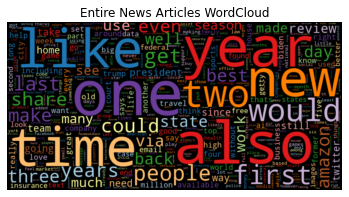

In [23]:
wordcloud(Text_Words_counts2['freq'], title="Entire News Articles WordCloud", max_words=500)

---

**With the preprocessing already done, the wordcloud doesn't tell us much. This is because it includes coverage of a variety of topics and news sources for the month of June. A deeper look into topics and sentiment might offer better opportunities to observe things like wordclouds and hence derive meaningful insights**

---

### Topic Modeling Non-Negative Matrix (NMF):

In [16]:
pipeline_basic = [remove_punctuation,remove_messy]
api_data_complete_df['clean_processed_text']=api_data_complete_df['processed_text'].apply(prepare,
                                                                                          pipeline = pipeline_basic)

In [59]:
tfidf_topic = TfidfVectorizer(stop_words=list(sw), min_df=5, max_df=0.7, ngram_range=(1,2))
topic_modeling_input = tfidf_topic.fit_transform(api_data_complete_df['clean_processed_text'])

In [60]:
nmf_text_model_news = NMF(n_components=10, random_state=314)
text_matrix = nmf_text_model_news.fit_transform(topic_modeling_input)
H_text_matrix = nmf_text_model_news.components_

Display Topics:

In [27]:
display_topics(nmf_text_model_news, tfidf_topic.get_feature_names_out())


Topic 00
  police (0.21)
  court (0.19)
  state (0.15)
  law (0.12)
  people (0.11)

Topic 01
  prop (1.01)
  runs (0.80)
  odds (0.75)
  rbi (0.66)
  games (0.64)

Topic 02
  trump (1.20)
  president (0.42)
  biden (0.41)
  trumps (0.35)
  indictment (0.32)

Topic 03
  amazon (0.57)
  review (0.43)
  amazon available (0.30)
  promising review (0.26)
  available (0.25)

Topic 04
  business (0.14)
  travel (0.12)
  insurance (0.12)
  work (0.12)
  travel insurance (0.11)

Topic 05
  russian (0.92)
  prigozhin (0.69)
  ukraine (0.66)
  wagner (0.59)
  putin (0.53)

Topic 06
  ai (2.37)
  generative (0.43)
  generative ai (0.41)
  data (0.38)
  technology (0.32)

Topic 07
  titanic (0.90)
  submersible (0.80)
  titan (0.67)
  oceangate (0.66)
  sub (0.42)

Topic 08
  inflation (0.44)
  rates (0.39)
  rate (0.36)
  loan (0.32)
  interest (0.27)

Topic 09
  season (0.26)
  draft (0.26)
  text (0.23)
  nba (0.23)
  email (0.23)


---

**Topic Modeling using NMF reveals that the top 10 topics present in news article data are:**

* Economy
* Sports/Baseball
* Presidency/Government
* Justice/Police
* Amazon Reviews
* Foreign Affairs/Ukraine/Russia
* Technology/AI regulation
* Titan Implosion
* Sports/NBA
* Sports/NFL

---

### Topic Modeling Latent Dirichlet Allocation (LDA):

In [145]:
count_text_vectorizer = CountVectorizer(stop_words=list(sw), min_df=5, max_df=0.7)
count_text_vectors = count_text_vectorizer.fit_transform(api_data_complete_df['clean_processed_text'])
count_text_vectors.shape

(36418, 62859)

In [146]:
lda_para_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_text_vectors)
H_lda_para_matrix = lda_para_model.components_

In [147]:
display_topics(lda_para_model, count_text_vectorizer.get_feature_names_out())



Topic 00
  people (0.79)
  one (0.49)
  year (0.47)
  police (0.39)
  also (0.39)

Topic 01
  nba (0.61)
  first (0.58)
  game (0.56)
  like (0.53)
  one (0.52)

Topic 02
  trump (0.81)
  court (0.68)
  president (0.62)
  biden (0.62)
  state (0.55)

Topic 03
  russian (0.99)
  ukraine (0.82)
  military (0.68)
  russia (0.60)
  war (0.54)

Topic 04
  amazon (1.22)
  review (0.97)
  available (0.71)
  one (0.69)
  like (0.67)

Topic 05
  ai (0.65)
  business (0.46)
  data (0.42)
  work (0.40)
  new (0.40)

Topic 06
  new (0.76)
  team (0.64)
  year (0.56)
  first (0.54)
  sports (0.48)

Topic 07
  year (0.62)
  china (0.54)
  new (0.50)
  company (0.49)
  billion (0.45)

Topic 08
  new (0.69)
  one (0.42)
  best (0.42)
  also (0.41)
  air (0.38)

Topic 09
  via (1.24)
  share (1.18)
  season (1.17)
  email (1.11)
  text (1.10)


In [148]:
lda_display = pyLDAvis.lda_model.prepare(lda_para_model, count_text_vectors, 
                                              count_text_vectorizer, sort_topics=False)
pyLDAvis.display(lda_display)

In [381]:
pyLDAvis.save_html(lda_display, 'lda_capstone1.html')

---

**Topic Modeling using LDA reveals that the top 10 topics present in news article data are:**

* Police
* Sports/NBA
* President/Government
* Russia/Ukraine
* Amazon
* Business/Tech/AI
* Sports
* China
* Entertainment/Summer Travel
* Twitter/Sports

----

### Topic Coherence Scores

In [ ]:
gensim=[[w for w in re.findall(r'\b\w\w+\b', text.lower()) if w not in sw] for text in api_data_complete_df['clean_processed_text']]

In [ ]:
dict_gensim = Dictionary(gensim)

In [ ]:

bow_gensim=[dict_gensim.doc2bow(word) for word in gensim]
tfIdf_gensim=TfidfModel(bow_gensim)
vectors_gensim=tfIdf_gensim[bow_gensim]
#nmf_gensim=Nmf(topic_modeling_input, num_topics=10, id2word=dict_gensim, kappa=0.1, eval_every=5)

In [ ]:
nmf_gensim=Nmf(vectors_gensim, num_topics=10, id2word=dict_gensim, kappa=0.1, eval_every=5)

In [ ]:
nmf_para_coherence = CoherenceModel(model=nmf_gensim,texts=gensim, dictionary=dict_gensim, coherence='c_v')
nmf_para_coherence_score=nmf_para_coherence.get_coherence()
print(nmf_para_coherence_score)

0.7388287040772206


In [ ]:
lda_gensim=LdaModel(corpus=bow_gensim,id2word=dict_gensim,alpha='auto',eta='auto',num_topics=10,eval_every=None, random_state=315)


In [ ]:
lda_coherence = CoherenceModel(model=lda_gensim, texts=gensim, dictionary=dict_gensim, coherence='c_v')
lda_coherence_score = lda_coherence.get_coherence()
print(lda_coherence_score)

0.4862222939294026


---

**NMF topic modeling has a coherence score of *0.7388* while LDA topic modeling has a coherence score of *0.4862*.**

**This is no surprised given the clarity of the topics found using NMF versus LDA where there were mixed topics overlapping one another as can be seen in the LDA charts. Since NMF has a much higher coherence score than LDA, we will use NMF topics for our future time-based charts for topic modeling.**

---

### Topical WordClouds

#### NMF Word Clouds for 10 topics:

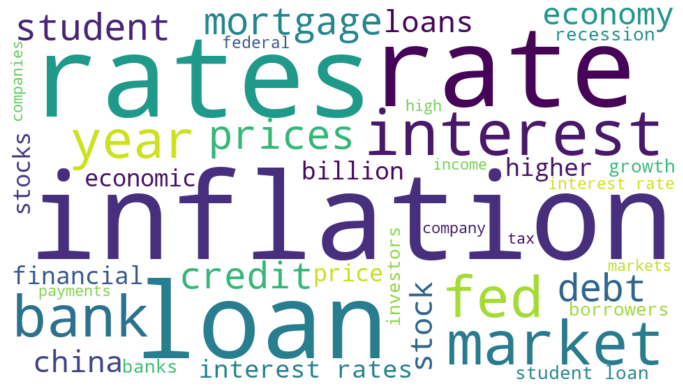

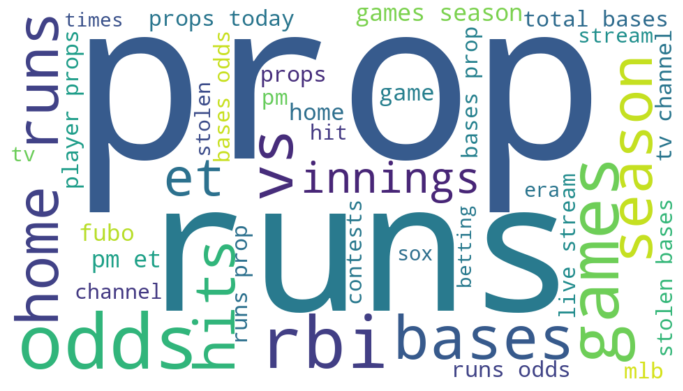

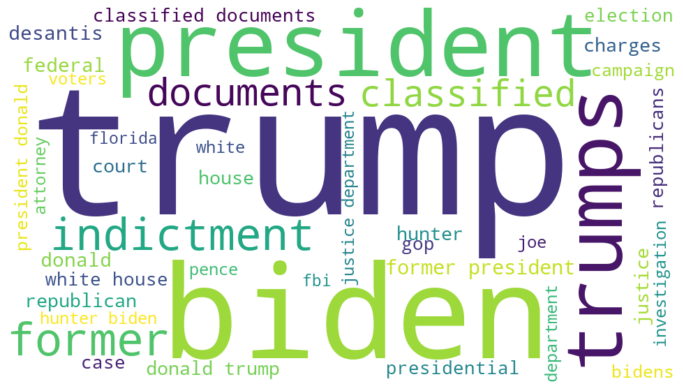

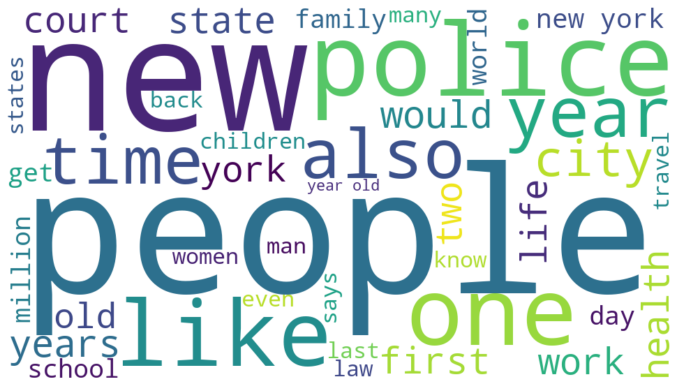

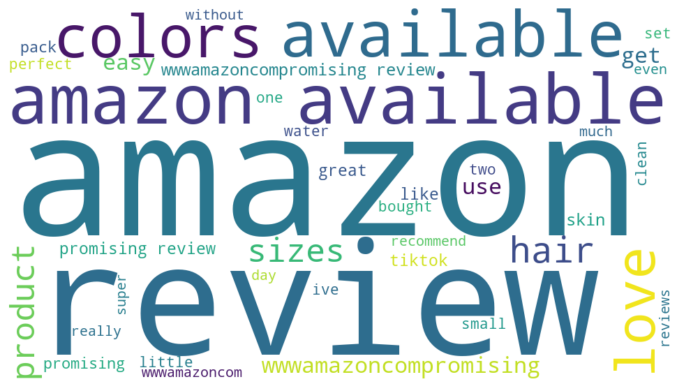

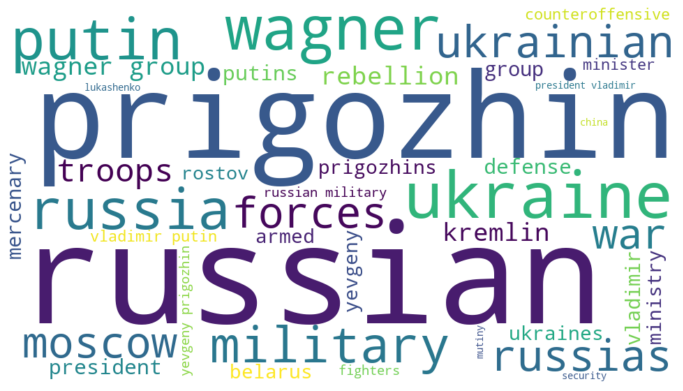

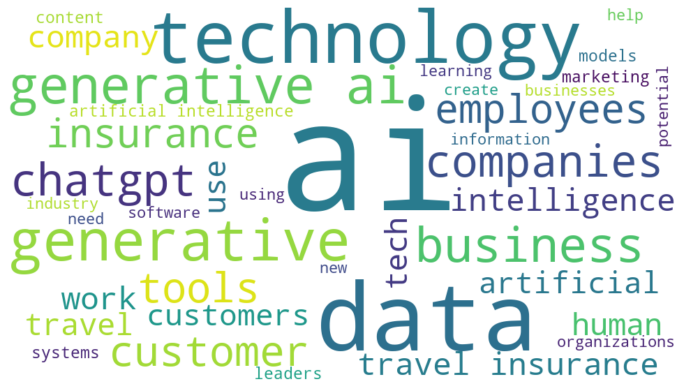

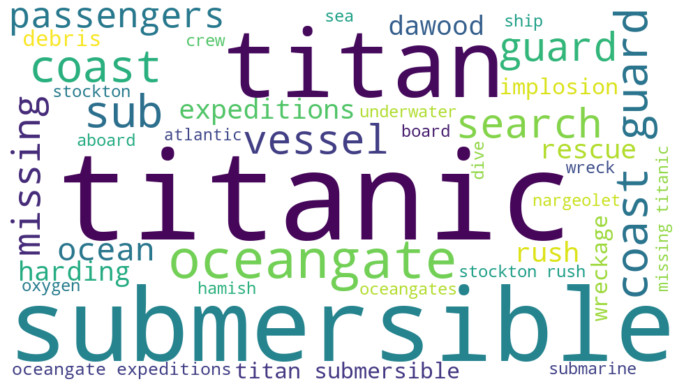

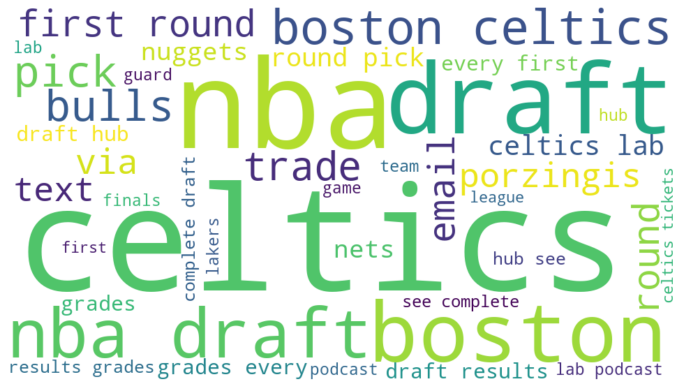

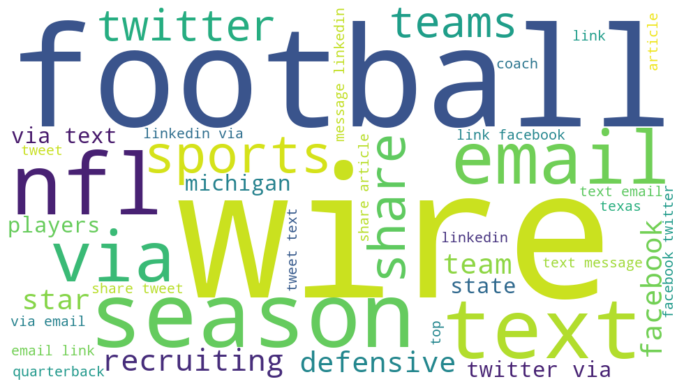

In [157]:
wordcloud_topics(nmf_text_model_news, tfidf_topic.get_feature_names_out())


#### LDA Word Clouds for 10 topics:

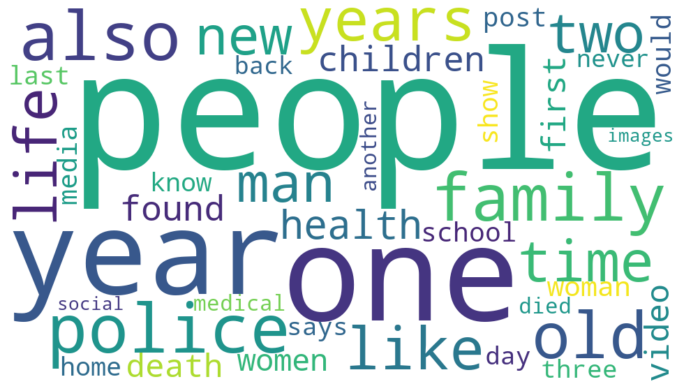

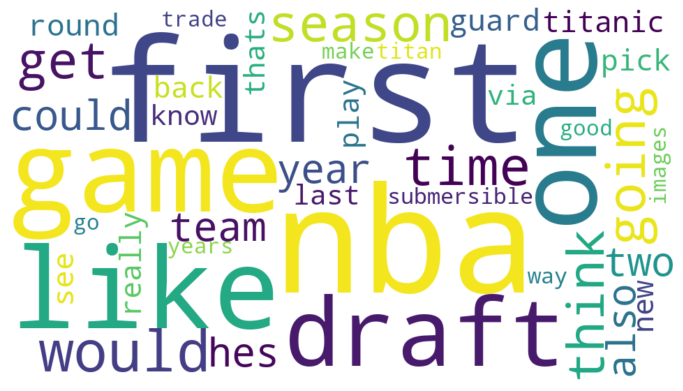

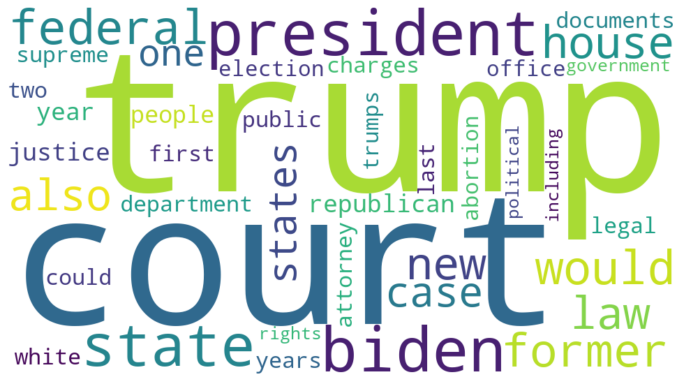

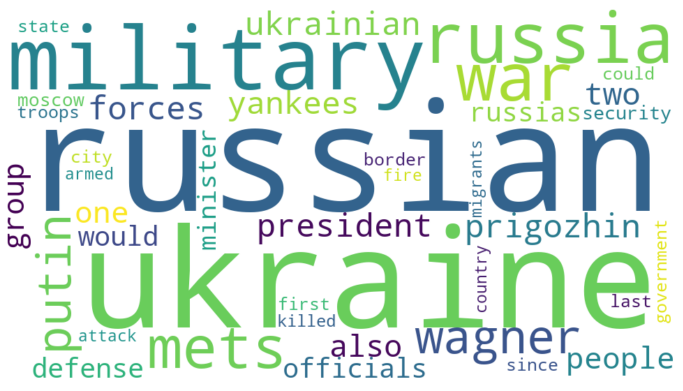

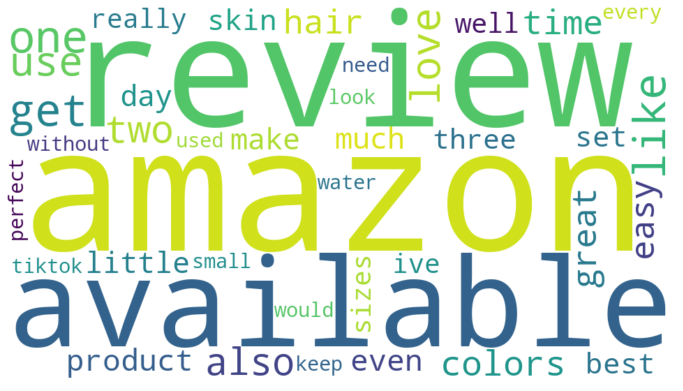

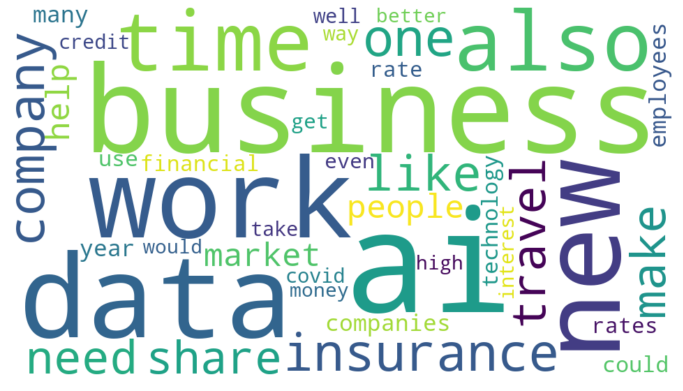

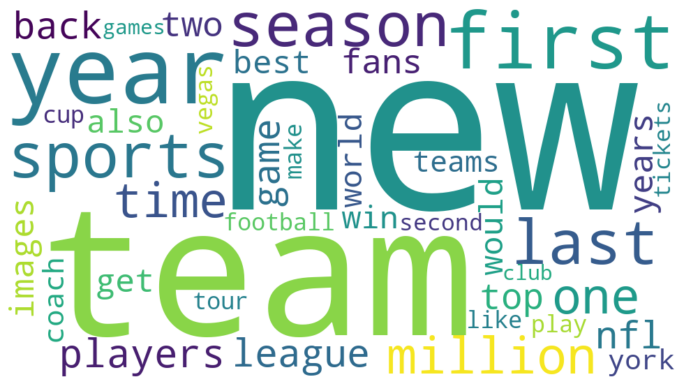

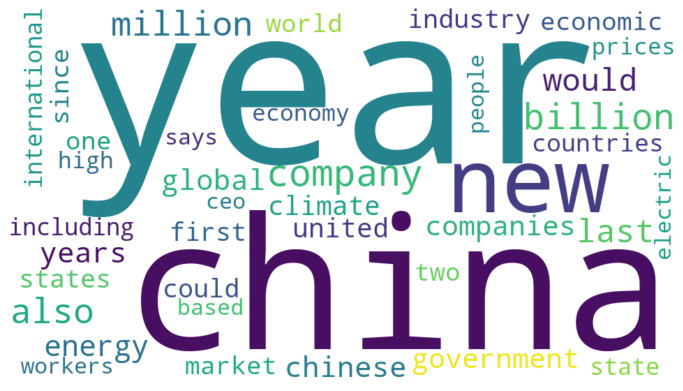

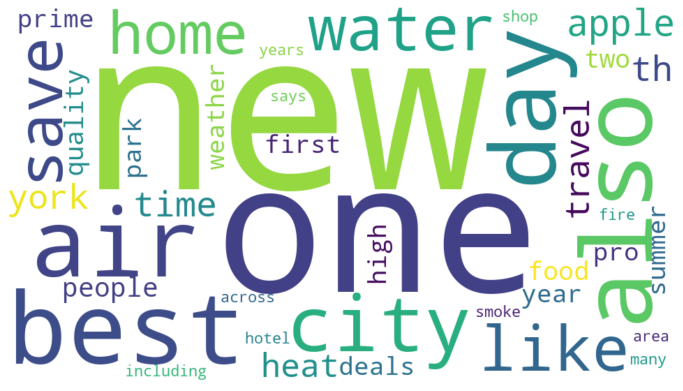

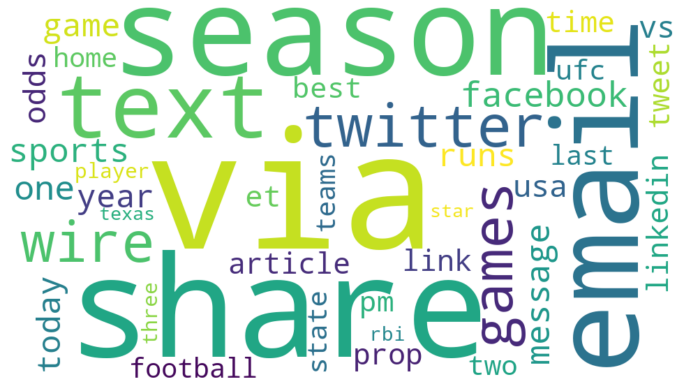

In [159]:
wordcloud_topics(lda_para_model, count_text_vectorizer.get_feature_names_out())

-----

### Time-based Charts for Topic modeling:

In [31]:
np.unique(api_data_complete_df['publish_date'])

array(['2023-05-31', '2023-06-01', '2023-06-02', '2023-06-03',
       '2023-06-04', '2023-06-05', '2023-06-06', '2023-06-07',
       '2023-06-08', '2023-06-09', '2023-06-10', '2023-06-11',
       '2023-06-12', '2023-06-13', '2023-06-14', '2023-06-15',
       '2023-06-16', '2023-06-17', '2023-06-18', '2023-06-19',
       '2023-06-20', '2023-06-21', '2023-06-22', '2023-06-23',
       '2023-06-24', '2023-06-25', '2023-06-26', '2023-06-27',
       '2023-06-28', '2023-06-29', '2023-06-30'], dtype=object)

In [55]:
topic_names = []
voc=tfidf_topic.get_feature_names_out()
for topic in nmf_text_model_news.components_:
    important = topic.argsort()
    top_word=voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append(top_word)

Add topic assignment number and name to each article as features:

In [56]:
#topic_ = defaultdict(list)
for idx, row in enumerate(text_matrix) : 
    topic3 = np.where(row == np.amax(row))[0]
    important_=topic3.argsort()
    api_data_complete_df.at[idx,"topic"]=topic3[0]
    api_data_complete_df.at[idx,"topic_name"]=topic_names[topic3[0]]

    
    #topic_[topic3[0]].

In [58]:
#word=voc[nmf_text_model_news.components_.argsort()[-1]] + " " + \
#    voc[nmf_text_model_news.components_.argsort()[-2]]


In [1]:
#api_data_complete_df.head()

<Figure size 1800x504 with 0 Axes>

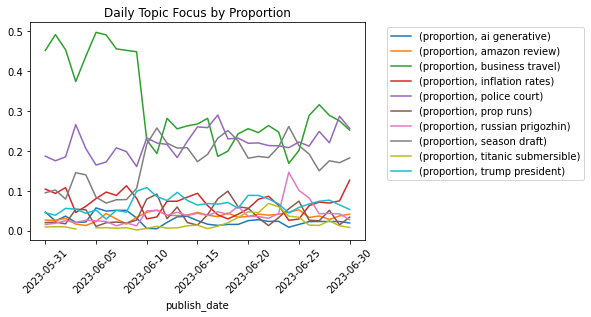

<Figure size 1800x504 with 0 Axes>

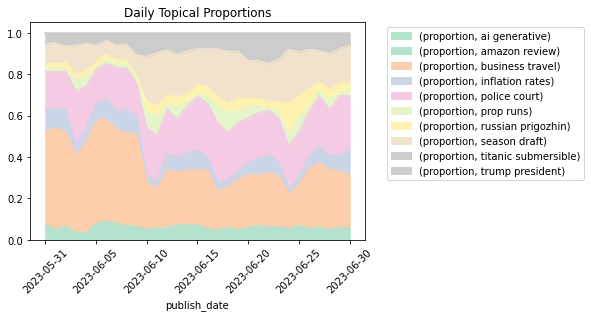

<Figure size 1800x504 with 0 Axes>

In [135]:


df_day1=api_data_complete_df[['publish_date', 'topic_name']]
topics_by_date=df_day1.groupby(df_day1['publish_date']).value_counts(normalize=True)

topics_by_date.head()


df_day=pd.DataFrame(topics_by_date)#.set_index(0)
df_day.head(20)
dfg = df_day.groupby(['publish_date', 'topic_name']).agg({'proportion': sum}).reset_index()
dfg.head()
df = dfg.set_index(['publish_date', 'topic_name']).unstack()
df.plot()
plt.title('Daily Topic Focus by Proportion')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.figure(figsize=(25, 7))


df.plot.area(colormap="Pastel2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.title('Daily Topical Proportions')
plt.figure(figsize=(25, 7))

---

**The topic modeling charts above are generated using Non-Negative Matrix Topic modeling (since this model had more well-defined topics than Latent Dirichlet Allocation modeling) and reveal the most relevant topic in the beginning of June was "Business and Travel," to then taper off to similar levels as that of "Police and Court."**

**Although TV media coverage was overwhelmingly about the titan submersible for that month, the online media does not exhibit this same behavior as it is covered, but not in a larger proportion as other topics.**

**Sports coverage appears to be high in proportion as a topic for the month since the topics "Season and Draft," which is likely about the NFL, and "Prop and Runs," which is likely refering to Baseball both add up to be significant topics in proportion**

----

### Analysis of "Amazon review" Topic

In [14]:
api_data_complete_df=pd.read_csv('../data/capstone_master_topic_assignment.csv')


In [41]:
api_data_complete_df.head(20)

Unnamed: 0  text_id source_name                                author  \
0            0        2   USA Today  USA TODAY, Emily DeLetter, USA TODAY   
1            1        3   USA Today     USA TODAY, Joy Ashford, USA TODAY   
2            2        5   USA Today                        Tar Heels Wire   
3            3        6   USA Today                        Roll Tide Wire   
4            4        7   USA Today                          Celtics Wire   
5            5        8   USA Today                           Lebron Wire   
6            6       14   USA Today                        Roll Tide Wire   
7            7       16   USA Today                           Eagles Wire   
8            8       18   USA Today                          Trojans Wire   
9            9       22    ABC News                           Teddy Grant   
10          10       23   USA Today                         Steelers Wire   
11          11       24   USA Today                             Rams Wire   
12          12       26   USA Today                        Roll Tide Wire   
13          13       27   USA Today                          Badgers Wire   
14          14       30   USA Today                             Rams Wire   
15          15       32   USA Today                           Giants Wire   
16          16       33   USA Today           Janelle Randazza, USA TODAY   
17          17       35   USA Today                        Buffaloes Wire   
18          18       38   USA Today                            Bills Wire   
19          19       39   USA Today              Ken Alltucker, USA TODAY   

                                                title  \
0   Tito's launches 'Tito's in a Big Can,' an empt...   
1   Search for missing actor Julian Sands continue...   
2   Four star running back picks Michigan State ov...   
3   Alabama center Charles Bediako signs one-year ...   
4   Ralph Sampson breaks down iconic Boston Celtic...   
5   Cowherd: Lakers are delusional for wanting to ...   
6   Recruiting Roundup: Latest Alabama Football re...   
7   Eagles’ 2023 training camp preview: Jalen Hurt...   
8   Lincoln Riley’s late-night emoji tweets equal ...   
9   Washington passes California as most expensive...   
10  Check out the pics of Steelers players with do...   
11  Look: Stetson Bennett caught a massive fish in...   
12  Alabama to remain a national title contender f...   
13  Badger football fans ranked average for overal...   
14  Rams get 2 more draft picks under contract, 8 ...   
15  Giants great Tiki Barber will announce CBS gam...   
16  13 things we're buying that are inspired by Hu...   
17  College football analyst reveals Pac-12 coache...   
18   PFF: Bills have a top-10 coach in Sean McDermott   
19  Against backdrop of a mental health care short...   

                                                  url publish_date  \
0   https://www.usatoday.com/story/money/food/2023...   2023-06-21   
1   https://www.usatoday.com/story/entertainment/c...   2023-06-20   
2   https://tarheelswire.usatoday.com/2023/06/24/f...   2023-06-25   
3   https://rolltidewire.usatoday.com/2023/06/23/a...   2023-06-23   
4   https://celticswire.usatoday.com/2023/06/23/nb...   2023-06-23   
5   https://lebronwire.usatoday.com/2023/06/29/cow...   2023-06-29   
6   https://rolltidewire.usatoday.com/lists/alabam...   2023-06-20   
7   https://theeagleswire.usatoday.com/lists/phila...   2023-06-23   
8   https://trojanswire.usatoday.com/2023/06/28/li...   2023-06-28   
9   https://abcnews.go.com/US/washington-passes-ca...   2023-06-22   
10  https://steelerswire.usatoday.com/2023/06/22/p...   2023-06-22   
11  https://theramswire.usatoday.com/2023/06/26/ra...   2023-06-26   
12  https://rolltidewire.usatoday.com/2023/06/27/a...   2023-06-27   
13  https://badgerswire.usatoday.com/2023/06/20/ba...   2023-06-21   
14  https://theramswire.usatoday.com/2023/06/21/ra...   2023-06-21   
15  https://giantswire.usatoday.com/2023/06/27/new...   2023-06-27  

In [45]:
Amazon_articles_idx = api_data_complete_df.groupby(api_data_complete_df['topic_name'] ==\
     'amazon review')['url']
Amazon_articles_df=pd.DataFrame(Amazon_articles_idx)
Amazon_articles_df.head()
Amazon_articles_df2=pd.DataFrame(Amazon_articles_df.iloc[1,1])



In [46]:
Amazon_articles_df2.head()


url
0    https://www.usatoday.com/story/money/food/2023...
16   https://www.usatoday.com/story/money/reviewed/...
34   https://www.usatoday.com/story/money/reviewed/...
56   https://www.usatoday.com/story/money/reviewed/...
109  https://www.usatoday.com/story/money/reviewed/...

In [43]:
Amazon_articles_df2.loc[16,'url']


'https://www.usatoday.com/story/money/reviewed/2023/06/22/the-bear-on-hulu-must-haves-when-watching-season-2/70347225007/'

In [47]:
Amazon_articles_df2.shape

(1370, 1)

---

**Upon deeper analysis of the topic_name "amazon review," we find that the total number of articles categorized as this topic are *1,370*. Most of these articles are Review-based on items purchased on Amazon. But some are ads or others are actual stories. Given the small number overall and the difficulty in parsing out the articles that are related to ads or reviews without removing the valid stories, we will keep these articles for now and analyze positive sentiment articles to see if these show up to then filter accordingly.**

---

### Missing Values:

Only one missing value for training data:

In [161]:
api_data_complete_df.isna().sum()

text_id                   0
source_name               0
author                  216
title                     0
url                       0
publish_date              0
article_text              0
content                   0
processed_text            2
processed_text_split      0
num_tokens                0
tokens                    0
clean_processed_text      0
dtype: int64

---

**Most missing data is from the author feature which is not relevant to our analysis. There are a couple records with missing processed_text which is used but insignificantly affects our final word count/topic modeling/sentiment analyses.**

---

### Save data so far:

In [162]:
api_data_complete_df.to_csv("capstone_master_topic_assignment.csv", sep=',')

----------------


## Random Viz Code:

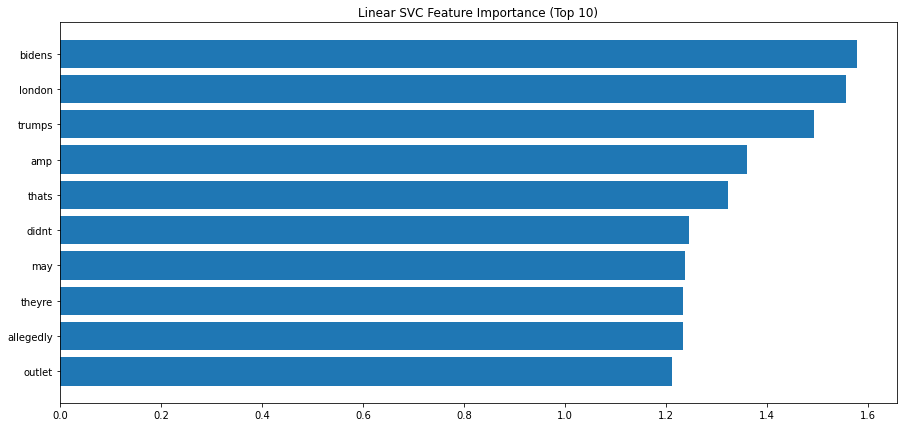

In [460]:
top_words_df.sort_values('var_imp',inplace=True)
plt.figure(figsize=(15,7))
plt.title('Linear SVC Feature Importance (Top 10)')
plt.barh([x for x in range(len(top_words_df['var_imp']))], top_words_df['var_imp'],
         tick_label=top_words_df['feature'])
plt.show()

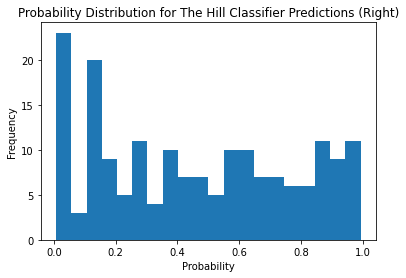

In [296]:
#AP_predictions_proba

plt.hist(AP_predictions_proba[:, 1], bins=20)
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Probability Distribution for The Hill Classifier Predictions (Right)')
plt.show()

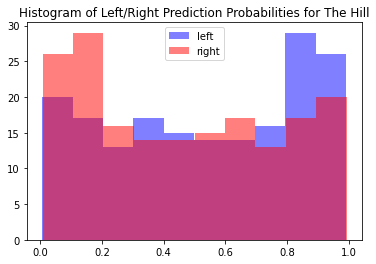

In [481]:
# Plotting histograms
plt.hist(AP_predictions_proba[:, 0], bins=10,
         alpha=0.5, color='blue', label='left')
plt.hist(AP_predictions_proba[:, 1], bins=10,
         alpha=0.5, color='red', label='right')

# Adding legend and title
plt.legend()
plt.title('Histogram of Left/Right Prediction Probabilities for The Hill')

# Displaying the plot
plt.show()

[Text(0, 0, '0.95'), Text(0, 0, '0.07')]

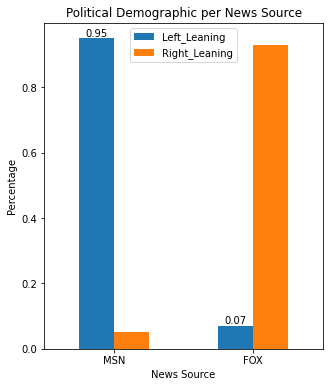

In [474]:
ax2=News_political_demographic.plot(kind="bar", x='News_Source',rot=0,
                                  legend=True,
                                  figsize=(5,6),
                                  xlabel='News Source',
                                  ylabel='Percentage',
                                  title='Political Demographic per News Source')
ax2.bar_label(ax2.containers[0])


[Text(0, 0, '17.49'),
 Text(0, 0, '16.89'),
 Text(0, 0, '12.7'),
 Text(0, 0, '11.5'),
 Text(0, 0, '11.07'),
 Text(0, 0, '9.58'),
 Text(0, 0, '9.2'),
 Text(0, 0, '8.9'),
 Text(0, 0, '8.77')]

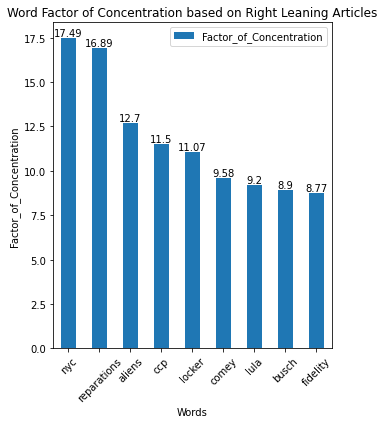

In [478]:
ax3=Concentration_Ratios_df[Concentration_Ratios_df['Political_Lean']=='Right'].plot(kind="bar", 
                                                                                     x='Word',rot=45,
                                  legend=True,
                                  figsize=(5,6),
                                  xlabel='Words',
                                  ylabel='Factor_of_Concentration',
                                  #='Political_Lean',
                                  title='Word Factor of Concentration based on Right Leaning Articles')
ax3.bar_label(ax3.containers[0])

[Text(0, 0, '17.39'),
 Text(0, 0, '16.14'),
 Text(0, 0, '14.19'),
 Text(0, 0, '13.6'),
 Text(0, 0, '13.08'),
 Text(0, 0, '12.24'),
 Text(0, 0, '11.59'),
 Text(0, 0, '9.54'),
 Text(0, 0, '9.74'),
 Text(0, 0, '9.74')]

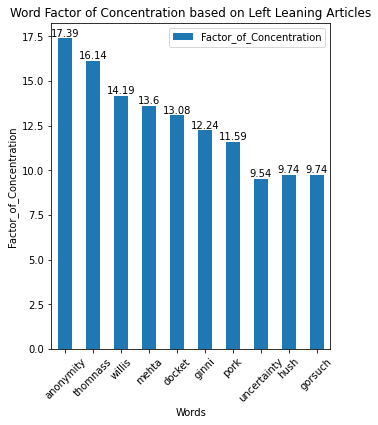

In [479]:
ax3=Concentration_Ratios_df[Concentration_Ratios_df['Political_Lean']=='Left'].plot(kind="bar", 
                                                                                    x='Word',rot=45,
                                  legend=True,
                                  figsize=(5,6),
                                  xlabel='Words',
                                  ylabel='Factor_of_Concentration',
                                  #='Political_Lean',
                                  title='Word Factor of Concentration based on Left Leaning Articles')
ax3.bar_label(ax3.containers[0])